In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cross_validation import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
data = pd.read_csv('data_collected.csv')


In [11]:
data.head()

,Height,Weight
0,61.825092,57.825092
1,69.108629,66.108629
2,70.029101,71.029101
3,68.434763,69.434763
4,61.556468,56.556468


In [12]:
data.describe()

,Height,Weight
count,75.000000,75.000000
mean,64.261610,63.034943
std,3.292811,4.412725
min,56.093852,52.093852
25%,62.238138,59.355446
50%,64.246562,62.831384
75%,66.472019,66.087063
max,71.054557,71.279161


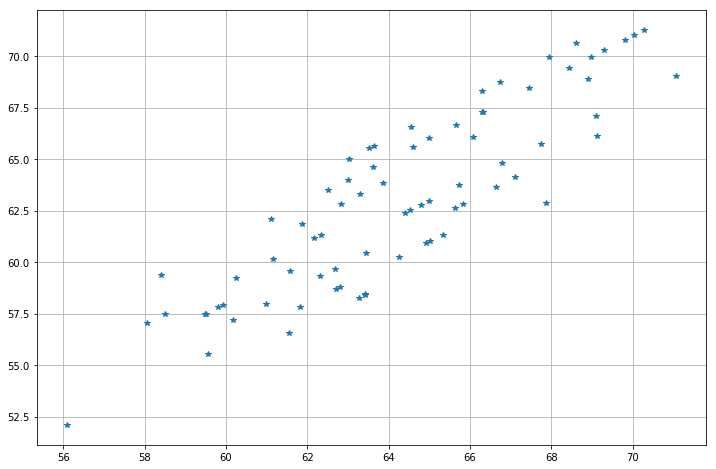

In [28]:
plt.figure(figsize=[12,8])
plt.plot(data["Height"],data["Weight"],"*")
plt.grid(True)
plt.show()

In [29]:
k_means = KMeans(n_clusters = 6)
k_means.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [30]:
# cluster centers 
centroids = k_means.cluster_centers_
centroids

array([[63.38517539, 64.38517539],
       [69.33096472, 70.13096472],
       [59.4069937 , 57.17622446],
       [66.6987845 , 66.85263066],
       [65.59412319, 62.59412319],
       [62.52253898, 59.77253898]])

In [31]:
# inert = sum of sqaured distance of sample to their closest cluster center
inert = k_means.inertia_
inert

193.28458070782568

In [33]:
# to set the border limits of the figure 
x_min ,x_max = data.iloc[:,0].min()-2,data.iloc[:,0].max()+4
y_min ,y_max = data.iloc[:,1].min()-2,data.iloc[:,1].max()+4

#Generating all possible pairs of height and weight
xx,yy  = np.meshgrid(np.arange(x_min,x_max,0.02),np.arange(y_min,y_max,0.02))

#Predicting the "Class" of each pair eith the model that is built
Z = k_means.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

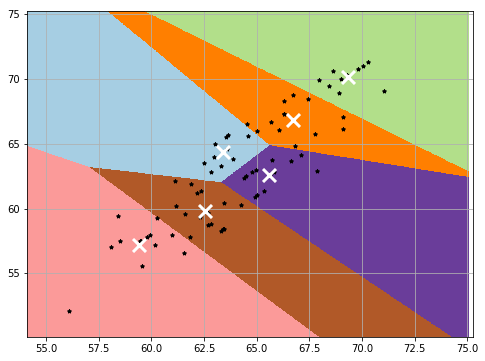

In [38]:
## PPlotting the figure fo rthe pair created adn corresponding class 
plt.figure(figsize=[8,6])
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation = 'nearest' , extent = (xx.min(),xx.max(),yy.min(),yy.max()),
           cmap=plt.cm.Paired , aspect = 'auto',origin = 'lower')
## Plotting actual data on the top of the above figire
plt.plot(data.iloc[:,0],data.iloc[:,1],'k*',markersize = 4)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=169,linewidth=3,color='w',zorder = 8)
plt.xlim(x_min,y_max)
plt.ylim(y_min,y_max)
plt.xticks()
plt.yticks()
plt.grid(True)
plt.show()